# Data engineering homework

This notebook contains solution 1 and 2 tasks.

## 1. Dimensions vs metrics

We need an estimation for a question: what part of the fields are metrics? It is not always easy to say exactly if this field metric is neither dimension. Ok to have answe liker: from 25% to 35%

In [414]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)

Read data

In [415]:
metrics = pd.read_csv('PATH')
metrics = metrics.sample(frac=1).reset_index(drop=True)
metrics.head()

,data_source_title,report_type_title,field_title,sql_field_name,api_field_name
0,Sizmek,Ads,PostImpressionsConversions,post_impressions_conversions,PostImpressionsConversions
1,Google Campaign Manager,Placements Roadblock,SiteID,site_id,siteId
2,Google Ads,Age Extended,Ad Group Final Mobile Urls (Deprecated),mobile_final_urls,ad_group.url_custom_parameters
3,TikTok Ads,Account Monthly,Registration,registration,registration
4,Partnerize,Partner Impressions,Partnership Model ID,partnership_model_id,partnership_model


Let's take a sample of 100 observations and try to understand how to determine metrics or dimensions

In [416]:
metrics.sample(100)

,data_source_title,report_type_title,field_title,sql_field_name,api_field_name
28220,Google Display&Video 360,Custom reach last 90 days,Partner Name,partner_name,Partner
24282,AppsFlyer,Daily Partners Report (User Acquisition),Loyal Users,loyal_users,Loyal Users
12825,Google Universal Analytics,Session Performance,Sessions,sessions,ga:sessions
27538,Ttarget,Campaign,Show Schedule,show_schedule,response.show_schedule
19062,AppsFlyer,Uninstalls,Event Count,event_count,event_count
1413,Amazon Advertising,Keywords Sponsored Brands,AdGroup ID,adgroup_id,adGroupId
9258,Google Campaign Manager,Ads Placements Sites Geo,MeasurableImpressions,measurable_impressions,activeViewMeasurableImpressions
10000,Google Ads,Device Keywords,Impressions,impressions,metrics.impressions
26715,Google Display&Video 360,Trueview Device Line Items,Third-Quartile Views (Video),third_quartile_views,METRIC_RICH_MEDIA_VIDEO_THIRD_QUARTILE_COMPLETES
3009,MailChimp,Lists,Web ID,web_id,web_id


The following rules immediately come to mind:
1. If the `sql_field_name` field ends with `id`, `type`, `status`, `at` or starts with `is`, then it is `dimensions`
2. If the `sql_field_name` field contains words like `cost`, `unique`, `click`, `conversion`, etc., then it is `metrics`
3. You can also notice that, as a rule, if the `sql_field_name` field ends in `s`, then most likely it is `metrics`
4. It is not always possible to understand from the name whether this field is `metrics` or `dimensions`

Let's make a rule that will determine whether a given observation is `metrics` or `dimensions`

In [417]:
def metric_dimensions_rule(row):
    
    sql_field = row['sql_field_name']
    
    metrics = [
        'total', 
        'click', 
        'spends', 
        'impressions', 
        'purchase',
        'revenue', 
        'unique', 
        'conversion', 
        'frequency', 
        'visits',
        'spend', 
        'install', 
        'views', 
        'rate', 
        'cost', 
        'count', 
        'value',
        'ctr', 
        'cpc', 
        'contacts', 
        'ratio', 
        'ces', 
        'ltv', 
        'price'
    ]
    
    dimensions = [
        'country', 
        'city', 
        'type', 
        'status', 
        'source'
    ]
    
    
    for metric in metrics:
        if metric in sql_field:
            return 'metrics'
        
    for dimension in dimensions:
        if dimension in sql_field:
            return 'dimensions'
    
    if sql_field[-2:] == 'at' or sql_field[-2:] == 'id':
        return 'dimensions'
    
    if sql_field[:2] == 'is':
        return 'dimensions'
    
    if sql_field[-1] == 's':
        return 'metrics'
    
    return 'dimensions'

How to evaluate?

The main problem is that this rule is not an exact estimate. Therefore, it seems to me that it cannot simply be applied to the entire general population.

Let's try to get around this problem and give a score range with Bootstrap.

In [418]:
state = np.random.RandomState(12345)

<AxesSubplot:ylabel='Frequency'>

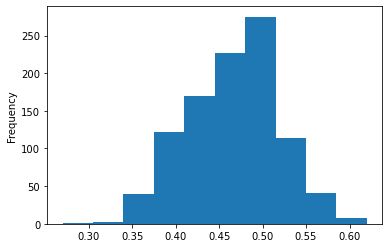

In [419]:
metric_rate = []

for i in range(1000):
    
    sample = metrics.sample(100, replace=True, random_state=state)
    sample['type'] = sample.apply(metric_dimensions_rule, axis=1)
    ratio = sample['type'].value_counts(normalize=True)['metrics']
    metric_rate.append(ratio)
    
pd.Series(metric_rate).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

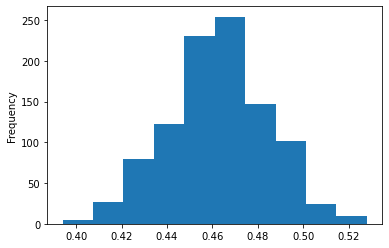

In [420]:
metric_rate = []

for i in range(1000):
    
    sample = metrics.sample(500, replace=True, random_state=state)
    sample['type'] = sample.apply(metric_dimensions_rule, axis=1)
    ratio = sample['type'].value_counts(normalize=True)['metrics']
    metric_rate.append(ratio)
    
pd.Series(metric_rate).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

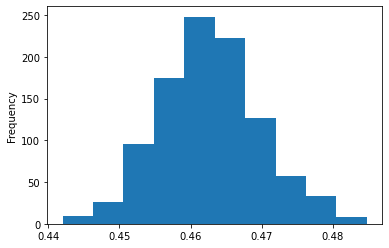

In [422]:
metric_rate = []

for i in range(1000):
    
    sample = metrics.sample(5000, replace=True, random_state=state)
    sample['type'] = sample.apply(metric_dimensions_rule, axis=1)
    ratio = sample['type'].value_counts(normalize=True)['metrics']
    metric_rate.append(ratio)
    
pd.Series(metric_rate).plot(kind='hist')

In the third case, I am satisfied with the resulting confidence interval. Due to the computational complexity and lack of accuracy requirements, it makes no sense to calculate further.

**Answer**

From 45% to 48%

## 2. Sales Manager conversions

Calculate conversion rate from touch to deal. What is the best.

Read data

In [423]:
sales = pd.read_csv('PATH', parse_dates = ['date'])

Info about data

In [424]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   client_account_id  3183 non-null   int64         
 1   date               3183 non-null   datetime64[ns]
 2   event_name         3183 non-null   object        
 3   manager_id         3183 non-null   float64       
 4   manager_nickname   3183 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 124.5+ KB


Sort by date

In [425]:
sales = sales.sort_values(by='date')

In [426]:
sales['date'].is_monotonic

True

In [427]:
sales.head()

,client_account_id,date,event_name,manager_id,manager_nickname
1661,1557,2021-05-16,first_touch,3.0,Joe Biden
694,659,2021-05-16,first_touch,3.0,Joe Biden
2729,2560,2021-05-16,first_touch,3.0,Joe Biden
1671,1567,2021-05-16,first_touch,3.0,Joe Biden
3178,2982,2021-05-17,first_touch,3.0,Joe Biden


In [428]:
sales.shape

(3183, 5)

In [429]:
client_with_deal = sales[sales['event_name']=='deal']['client_account_id'].values
client_with_deal.shape

(196,)

A total of 196 deals were made.

Let's check if in all cases first_touch happens before deal.

In [430]:
sales_check_date = sales[sales['client_account_id'].isin(client_with_deal)]

columns_to_show = [
    'client_account_id', 
    'event_name', 
    'date', 
    'manager_id'
]

sales_check_date = sales_check_date[columns_to_show].\
                   set_index(['client_account_id', 'event_name']).\
                   unstack().\
                   reset_index(drop=False)

sales_check_date.columns = [
    'client_account_id', 
    'deal_date', 
    'first_touch_date',
    'deal_manager_id',
    'first_touch_manager_id'
]

sales_check_date['difference_date'] = sales_check_date['first_touch_date'] - sales_check_date['deal_date']
sales_check_date.head()

,client_account_id,deal_date,first_touch_date,deal_manager_id,first_touch_manager_id,difference_date
0,40,2022-02-24,2022-05-02,3.0,1.0,67 days
1,63,2022-03-14,2022-02-03,2.0,1.0,-39 days
2,86,2022-05-24,2021-12-17,1.0,3.0,-158 days
3,87,2022-05-23,2022-05-30,2.0,1.0,7 days
4,127,2021-08-30,2022-05-22,3.0,1.0,265 days


In [432]:
strange_client_sales = sales_check_date[sales_check_date['difference_date'] > '0']
strange_client_sales.shape

(80, 6)

In [433]:
strange_client_sales.head()

,client_account_id,deal_date,first_touch_date,deal_manager_id,first_touch_manager_id,difference_date
0,40,2022-02-24,2022-05-02,3.0,1.0,67 days
3,87,2022-05-23,2022-05-30,2.0,1.0,7 days
4,127,2021-08-30,2022-05-22,3.0,1.0,265 days
5,134,2022-02-10,2022-04-09,3.0,1.0,58 days
9,145,2022-02-22,2022-05-29,3.0,1.0,96 days


Thus, in 80 out of 196 sales, `deal` occurs first, and then `first_touch`.

What does this mean? Is this a mistake of the people who use the database?

**Hypothesis:** the client immediately, in the first call, makes a `deal`, and then turns to another manager for additional purchase, and for him this is the `first_touch`

In [434]:
strange_client_sales[strange_client_sales['deal_manager_id'] == strange_client_sales['first_touch_manager_id']]

,client_account_id,deal_date,first_touch_date,deal_manager_id,first_touch_manager_id,difference_date
15,259,2022-03-09,2022-05-15,3.0,3.0,67 days
22,430,2022-04-12,2022-05-17,1.0,1.0,35 days
31,596,2021-10-13,2022-01-21,3.0,3.0,100 days
33,610,2021-09-23,2021-10-19,3.0,3.0,26 days
45,797,2022-05-17,2022-05-25,2.0,2.0,8 days
50,839,2022-04-20,2022-05-17,1.0,1.0,27 days
53,917,2022-02-04,2022-05-17,2.0,2.0,102 days
57,970,2022-03-02,2022-05-07,2.0,2.0,66 days
61,988,2021-12-23,2022-01-28,2.0,2.0,36 days
75,1132,2022-03-04,2022-04-23,2.0,2.0,50 days


In [435]:
error_client = strange_client_sales[strange_client_sales['deal_manager_id'] == 
                                    strange_client_sales['first_touch_manager_id']]['client_account_id'].values
error_client.shape

(22,)

This is obviously a misleading `deal`/`first_touch` data because the same manager cannot make the deal first and then make the first contact.

In [436]:
strange_client_sales[~(strange_client_sales['deal_manager_id'] == strange_client_sales['first_touch_manager_id'])]

,client_account_id,deal_date,first_touch_date,deal_manager_id,first_touch_manager_id,difference_date
0,40,2022-02-24,2022-05-02,3.0,1.0,67 days
3,87,2022-05-23,2022-05-30,2.0,1.0,7 days
4,127,2021-08-30,2022-05-22,3.0,1.0,265 days
5,134,2022-02-10,2022-04-09,3.0,1.0,58 days
9,145,2022-02-22,2022-05-29,3.0,1.0,96 days
12,218,2022-02-09,2022-02-10,3.0,1.0,1 days
14,252,2021-08-29,2022-04-27,3.0,1.0,241 days
16,270,2022-03-21,2022-04-20,3.0,1.0,30 days
23,435,2021-09-07,2022-04-27,3.0,1.0,232 days
27,497,2022-01-05,2022-02-01,2.0,3.0,27 days


**Possible explanation for the data:**
1. Manager makes a deal
2. The client is satisfied with the deal and after a certain period of time wants to make another deal
3. This client goes to another manager
4. Customer is not satisfied with the offer
5. For another manager, this client will be first_touch, although in fact the client has already made a deal.

**What to do**: It might be correct in sales to keep all `deals`, but remove `first_touch` information as not true.

In [437]:
damaged_client = strange_client_sales[~(strange_client_sales['deal_manager_id'] == 
                                        strange_client_sales['first_touch_manager_id'])]['client_account_id'].values
damaged_client.shape

(58,)

In [438]:
sales = sales[~(sales['client_account_id'].isin(error_client))]
sales = sales[~((sales['client_account_id'].isin(damaged_client)) & 
                (sales['event_name'] == 'first_touch'))]
sales.shape

(3081, 5)

Thus we have 3081 observations

**Calculate conversions**

2 situations are possible:
1. The manager leads the client from first_touch to deal. It's `personal_conversions`.
2. Manager conducts first_touch, deal produces another manager. It's `mixed_conversions`

In [439]:
manager_count_per_client = sales.groupby('client_account_id')['manager_id'].nunique().reset_index()
manager_count_per_client

,client_account_id,manager_id
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
2960,2982,1
2961,2983,1
2962,2984,1
2963,2985,1


In [440]:
client_with_one_manager = manager_count_per_client[manager_count_per_client['manager_id']==1]['client_account_id'].values
client_with_one_manager.shape

(2892,)

In [441]:
sales_one_manager = sales[sales['client_account_id'].isin(client_with_one_manager)]
sales_one_manager.head()

,client_account_id,date,event_name,manager_id,manager_nickname
1661,1557,2021-05-16,first_touch,3.0,Joe Biden
2729,2560,2021-05-16,first_touch,3.0,Joe Biden
1671,1567,2021-05-16,first_touch,3.0,Joe Biden
3178,2982,2021-05-17,first_touch,3.0,Joe Biden
1992,1875,2021-05-18,first_touch,3.0,Joe Biden


In [442]:
personal_conversions = sales_one_manager.pivot_table(
    index='manager_id',
    columns='event_name',
    values='date',
    aggfunc='count'
)

personal_conversions['conversions'] = personal_conversions['deal'] * 100 / (personal_conversions['deal'] + personal_conversions['first_touch'])
personal_conversions

event_name,deal,first_touch,conversions
manager_id,,,
1.0,9,845,1.053864
2.0,30,886,3.275109
3.0,62,1103,5.321888


In [443]:
mixed_conversions = sales.pivot_table(
    index='manager_id',
    columns='event_name',
    values='date',
    aggfunc='count'
)

mixed_conversions['conversions'] = mixed_conversions['deal'] * 100 / (mixed_conversions['deal'] + mixed_conversions['first_touch'])
mixed_conversions

event_name,deal,first_touch,conversions
manager_id,,,
1.0,34,854,3.828829
2.0,60,911,6.179197
3.0,80,1142,6.546645


**Answer**

Joe Biden leads both personal_conversions and mixed_conversions with 5.32% / 6.54% respectively